In [ ]:
%pip install kaggle

In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
#Download dataset kedalam folder content
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d sivarazadi/wikiart-art-movementsstyles

In [ ]:
#unzip folder dataset
!unzip "/content/wikiart-art-movementsstyles.zip" -d "/content/art-movementsstyles/"

In [ ]:
! pip install Keras-Preprocessing

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2, VGG16
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

# **Prep Dataset New**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project 

/content/drive/MyDrive/Project


# **Install Packages**

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
! pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2, VGG16
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

# **Splitting**

In [ ]:
# Creating dataframe with art movement class weights
art_movements = pd.DataFrame()
art_movements['names'] = ['Abstrack','Fauvism','Fiber Art','Japanese','Pop Art','Romantivism']
art_movements['# of paintings'] = [20,20,20,20,20,20]
art_movements = art_movements.sort_values(by=['# of paintings'], ascending=False)
art_movements = art_movements.reset_index(drop=True)
art_movements['class_weight'] = art_movements['# of paintings'].sum() / (art_movements.shape[0] * art_movements['# of paintings'])
class_weights = art_movements['class_weight'].to_dict()
print(class_weights)
art_movements_name = art_movements['names'].values
print(art_movements_name)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}
['Abstrack' 'Fauvism' 'Fiber Art' 'Japanese' 'Pop Art' 'Romantivism']


In [ ]:
batch_size = 64
train_input_shape = (256, 256, 3)

datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range= 5,
    zoom_range=0.05,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Project/dataset_coba',
    target_size=train_input_shape[0:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle =True,
    subset='training',
    seed=123,
    classes=art_movements_name.tolist()
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Project/dataset_coba', #use the same data with train
    target_size=train_input_shape[0:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle =True,
    subset='validation',
    seed=123,
    classes=art_movements_name.tolist()
)

Found 32 images belonging to 6 classes.
Found 8 images belonging to 6 classes.


In [ ]:
# Adding model steps
Step_Train = train_generator.n//train_generator.batch_size
Step_Validation = validation_generator.n//validation_generator.batch_size
print("Total number of batches =", Step_Train, "and", Step_Validation)

Total number of batches = 0 and 0


(36, 256, 256, 3)
Abstrack


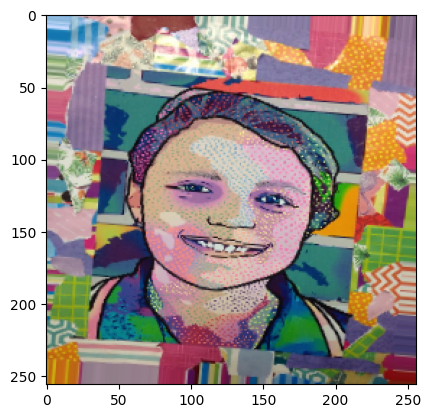

(36, 256, 256, 3)
Abstrack


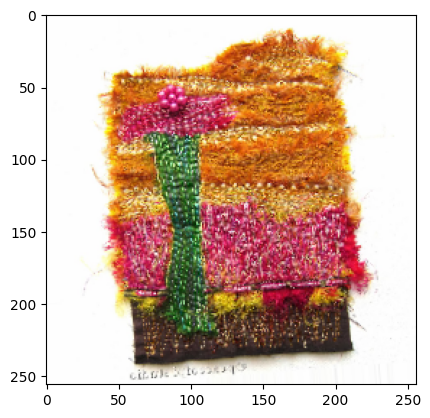

(36, 256, 256, 3)
Abstrack


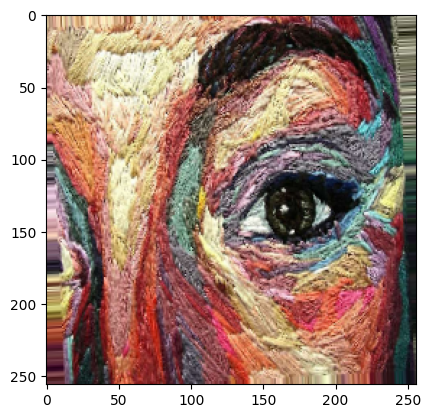

(36, 256, 256, 3)
Abstrack


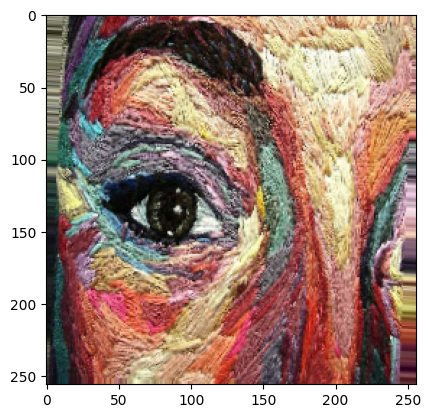

(36, 256, 256, 3)
Abstrack


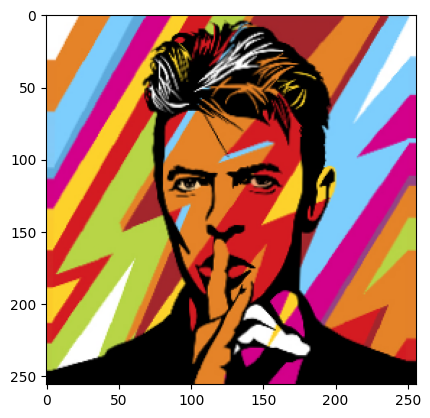

In [ ]:
import numpy as np
# Get the label to string mapping
label_to_str = {v: k for k, v in train_generator.class_indices.items()}

# Display some artworks
for _ in range(5):
    img, label = train_generator.next()
    random_index = np.random.randint(0, img.shape[0])
    image = img[random_index]
    image_label = label[random_index]
    print(img.shape) 
    plt.imshow(image)
    label_list = image_label.tolist()  
    print(label_to_str[label_list[0]])
    plt.show()

# **Splitting 2 (jgn di run wkwk)**

In [ ]:
! pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders # or import splitfolders
input_folder = "/content/drive/MyDrive/Project/dataset_coba"
output = "/content/drive/MyDrive/Project/dataset_coba2" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 120 files [00:33,  3.57 files/s]


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Project/dataset_coba2/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Project/dataset_coba2/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=126
)

Found 64 images belonging to 6 classes.
Found 16 images belonging to 6 classes.


# **Assign Callbacks for Training**

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

# **Create Model Layers**

In [ ]:
# Load the Resnet50V2 pretrained model
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(256,256,3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
# Add extra layers to model
output = base_model.output

output = Flatten()(output)

output = Dense(256, kernel_initializer='he_uniform')(output)
output = Dropout(0.5)(output)
output = BatchNormalization()(output)
output = Activation('relu')(output)

output = Dense(128, kernel_initializer='he_uniform')(output)
output = Dropout(0.25)(output)
output = BatchNormalization()(output)
output = Activation('relu')(output)

output = Dense(64, kernel_initializer='he_uniform')(output)
output = Dropout(0.25)(output)
output = BatchNormalization()(output)
output = Activation('relu')(output)

output = Dense(32, kernel_initializer='he_uniform')(output)
output = BatchNormalization()(output)
output = Activation('relu')(output)

output = Dense(6, activation='softmax')(output)

model = Model(inputs=base_model.inputs, outputs=output)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

# **Model 2 (jgn di run lg wkwk)**

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 256x256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 128)     

# **Compile the Model**

In [ ]:
adam = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **Compile Model (jgn di run yah)**

In [ ]:
do_fine_tuning = False #@param {type:"boolean"}

In [ ]:
! pip install tensorflow_hub
import tensorflow_hub as hub

In [ ]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

In [ ]:
if do_fine_tuning:
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
else:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Model fit**

In [ ]:
model.fit(train_generator, 
          validation_data=validation_generator,
          steps_per_epoch = 20,
          epochs=30,
          shuffle=True,
          verbose=1,
          #callbacks=[reduce_lr, early_stop],
          class_weight=class_weights)

# **Image Classification**

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  #Upload image
  path = fn
  img = load_img(path, target_size=(256, 256))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  #Predict image
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  round(classes,0)

TypeError: ignored

In [ ]:
classes[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(classes[0])

2

In [ ]:
if(np.argmax(classes[0])) == 12:
  print("Western Medieval: Artworks belonging to Byzantine, Pre-Romanesque, Gothic, Medieval, and Coptic movements")
elif(np.argmax(classes[0])) == 11:
  print("Symbolism: Symbolism was a late nineteenth-century art movement of French, Russian and Belgian origin in poetry and other arts. Distinct from, but related to, the style of literature, symbolism in art is related to the gothic component of Romanticism and Impressionism.")
elif(np.argmax(classes[0])) == 10:
  print("Romanticism: Romanticism (also the Romantic era or the Romantic period) was an artistic, literary, musical and intellectual movement that originated in Europe toward the end of the 18th century and in most areas was at its peak in the approximate period from 1800 to 1850. Romanticism was characterized by its emphasis on emotion and individualism as well as glorification of all the past and nature, preferring the medieval rather than the classical.")
elif(np.argmax(classes[0])) == 9:
  print("Rococo: Rococo infused the world of art and interior design with an aristocratic idealism that favored elaborate ornamentation and intricate detailing. The paintings that became the signature to the era were created in celebration of Rococo's grandiose ideals and lust for the aristocratic lifestyle and pastimes. The movement, which developed in France in the early 1700s, evolved into a new, over-the-top marriage of the decorative and fine arts, which became a visual lexicon that infiltrated 18th-century continental Europe.")
elif(np.argmax(classes[0])) == 8:
  print("Renaissance (Western): The Renaissance is a period in European history marking the transition from the Middle Ages to modernity and covering the 15th and 16th centuries, characterized by an effort to revive and surpass ideas and achievements of classical antiquity.")
elif(np.argmax(classes[0])) == 7:
  print("Realism: Realism in the arts is the attempt to represent subject matter truthfully, without artificiality and avoiding artistic conventions, implausible, exotic, and supernatural elements. Realism has been prevalent in the arts for many periods and is in large part a matter of technique and training, and the avoidance of stylization.")
elif(np.argmax(classes[0])) == 6:
  print("Primitivism (Naïve Art): Primitivism is a Western art movement that borrows visual forms from non-Western or prehistoric peoples, such as Paul Gauguin's inclusion of Tahitian motifs in paintings and ceramics. Borrowings from primitive art have been important to the development of modern art.")
elif(np.argmax(classes[0])) == 5:
  print("Art Nouveau: Art Nouveau is an international style of art, architecture, and applied art, especially the decorative arts, that was most popular between 1890 and 1910. A reaction to the academic art of the 19th century, it was inspired by natural forms and structures, particularly the curved lines of plants and flowers.")
elif(np.argmax(classes[0])) == 4:
  print("Neoclassicism: Europeans of the 18th century Age of Enlightenment wanted their artwork and architecture to mirror and carry the same standards as the idealized works of the Greeks and Romans. In conjunction with the exciting archaeological rediscoveries of Pompeii and Herculaneum in Rome, Neoclassicism arose as artists and architects infused their work with past Greco-Roman ideals. A return to the study of science, history, mathematics, and anatomical correctness abounded, replacing the Rococo vanity culture and court-painting climate that preceded.")
elif(np.argmax(classes[0])) == 3:
  print("Japanese Art: Art from Japan from the Muromachi period (1392-1573) all the way to the Shōwa period (1926-1989)")
elif(np.argmax(classes[0])) == 2:
  print("Expressionism: Expressionism was a modernist movement, initially in poetry and painting, originating in Germany at the beginning of the 20th century. Its typical trait is to present the world solely from a subjective perspective, distorting it radically for emotional effect in order to evoke moods or ideas. Expressionist artists sought to express the meaning of emotional experience rather than physical reality.")
elif(np.argmax(classes[0])) == 1:
  print("Baroque: The origin of the term Baroque is a bit ambiguous. Many scholars think it was derived from the Portuguese barrocco, meaning an imperfect or irregularly shaped pearl. And some, like the philosopher Jean-Jacques Rousseau thought it was derived from the Italian barocco, a term used to describe an obstacle in formal logic in the medieval period.")
else:
  print("Academic Art: Academic art, or Academicism, is a style of painting and sculpture produced under the influence of European academies of art. Specifically, academic art is the art and artists influenced by the standards of the French Académie des Beaux-Arts, which practiced under the movements of Neoclassicism and Romanticism, and the art that followed these two movements in the attempt to synthesize both of their styles.")

Baroque: The origin of the term Baroque is a bit ambiguous. Many scholars think it was derived from the Portuguese barrocco, meaning an imperfect or irregularly shaped pearl. And some, like the philosopher Jean-Jacques Rousseau thought it was derived from the Italian barocco, a term used to describe an obstacle in formal logic in the medieval period.


# **Related Images**

In [ ]:
dataset = "/content/drive/MyDrive/Project/new_dataset/Baroque"

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # upload images
  path = fn
  img = load_img(path, target_size=(256, 256))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  output = np.argmax(classes[0])

  # Display some artworks
  for _ in range(5):
      img, label = dataset.next()
      random_index = np.random.randint(0, img.shape[0])
      image = img[random_index]
      image_label = label[random_index]
      print(img.shape) 
      plt.imshow(image)
      label_list = image_label.tolist()  
      print(label_to_str[label_list[0]])
      plt.show()

(64, 256, 256, 3)
Academic


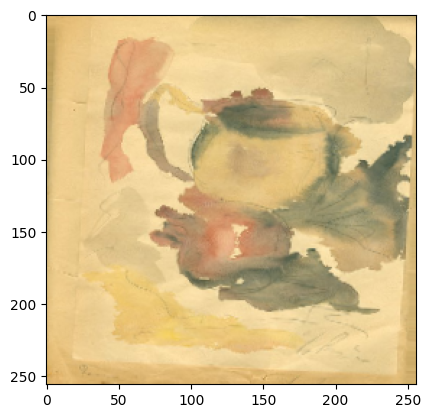

(64, 256, 256, 3)
Academic


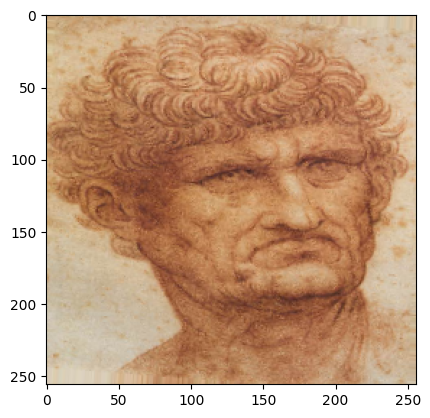

(64, 256, 256, 3)
Academic


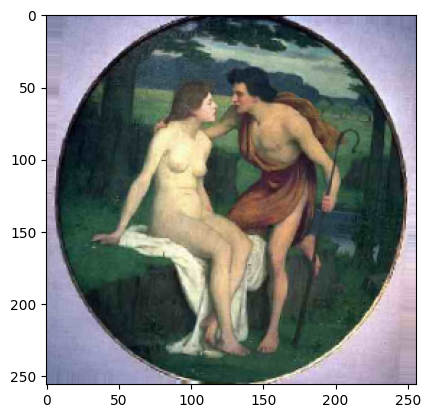

(64, 256, 256, 3)
Academic


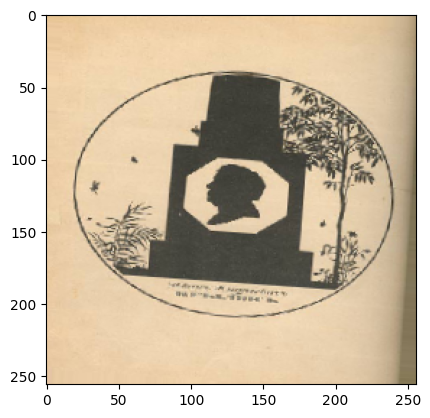

(64, 256, 256, 3)
Academic


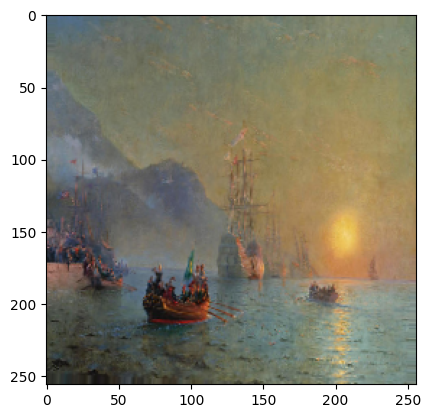

In [ ]:
import numpy as np
# Get the label to string mapping
label_to_str = {v: k for k, v in train_generator.class_indices.items()}

# Display some artworks
for _ in range(5):
    img, label = dataset.next()
    random_index = np.random.randint(0, img.shape[0])
    image = img[random_index]
    image_label = label[random_index]
    print(img.shape) 
    plt.imshow(image)
    label_list = image_label.tolist()  
    print(label_to_str[label_list[0]])
    plt.show()

# **Export the Model**

In [ ]:
RPS_SAVED_MODEL = "rps_saved_model"

In [ ]:
tf.saved_model.save(model, RPS_SAVED_MODEL)

In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['conv2d_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 256, 256, 3)
      name: serving_default_conv2d_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 13)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2023-05-21 05:46:03.316815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'conv2d_input': TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='conv2d_input')})
{'dense_1': TensorSpec(shape=(None, 13), dtype=tf.float32, name='dense_1')}


In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)

converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]

tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

52454404

In [ ]:
converter.experimental_new_converter = True

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

coba2

# Test the TFLite Model Using the Python Interpreter (Randomly Picts)

In [ ]:
# Load TFLite model and allocate tensors.
with open(tflite_model_file, 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
# Gather results for the randomly sampled val images
predictions = []

from tqdm import tqdm

val_labels, val_imgs = [], []
for img, label in tqdm(validation_generator.take(10)):
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    
    val_labels.append(label.numpy()[0])
    val_imgs.append(img)

AttributeError: ignored

**Utility functions for plotting**

In [ ]:
class_names = ['Acadmic', 'Baroque', 'Expressionism', 'Japanese', 'Neoclassicism', 'Nouveau', 'Primitivism', 'Realism', 'Renaissance', 'Rococo','Romanticism', 'Symbolism', 'Western Medieval']

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = np.squeeze(img)
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    print(type(predicted_label), type(true_label))
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)
    print(predicted_label)

**Visualize the outputs**

In [ ]:
#@title Visualize the outputs { run: "auto" }
index = 0 #@param {type:"slider", min:0, max:9, step:1}
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_imgs)
plt.show()

**Description of Images**

In [ ]:
predicted_label = label_img
if label_img == 0:
  print("Academic art, or Academicism, is a style of painting and sculpture produced under the influence of European academies of art. Specifically, academic art is the art and artists influenced by the standards of the French Académie des Beaux-Arts, which practiced under the movements of Neoclassicism and Romanticism, and the art that followed these two movements in the attempt to synthesize both of their styles.")
elif label_img == 1:
  print('The origin of the term Baroque is a bit ambiguous. Many scholars think it was derived from the Portuguese barrocco, meaning an imperfect or irregularly shaped pearl. And some, like the philosopher Jean-Jacques Rousseau thought it was derived from the Italian barocco, a term used to describe an obstacle in formal logic in the medieval period.')
elif label_img == 2:
  print('')

In [ ]:
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

NameError: ignored

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass